In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_10degree = pd.read_csv('x_10degree.csv',header=None)

In [5]:
x_10degree = x_10degree.to_numpy(dtype='float32')

In [6]:
x = x_10degree[:, 0:15]

In [7]:
x = x.reshape(((36*3+1)*6, n_sensors, 1))

In [8]:
print(x_10degree.shape)

(654, 17)


In [9]:
y_10degree = pd.read_csv('y_output(10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_10degree = y_10degree.to_numpy(dtype='float32')

In [12]:
y = y_10degree.reshape(((36*3+1)*6, 100, 100))

In [13]:
tsr = x_10degree[:, -2]

In [14]:
theta = x_10degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.3,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(457, 100, 100)


In [17]:
print(y_test.shape)

(197, 100, 100)


In [18]:
print(x_train.shape)

(457, 15, 1)


In [19]:
print(x_test.shape)

(197, 15, 1)


In [20]:
theta_train

array([ 900.,  280., 1000.,  320.,  490.,  280.,   90.,  170., 1020.,
        360.,  940.,  840.,  840.,  190.,  220.,  940.,  870.,  660.,
        930.,  520.,  300.,  510.,  280.,  750.,  900.,  690., 1070.,
        440.,  750.,  120.,  920.,  340.,  680.,  140.,  370.,  830.,
        790.,  150.,  310.,  380.,  180.,  130.,  880.,   40.,   80.,
        320.,  600.,  330.,  200.,    0., 1010.,   10.,  930.,  260.,
        760.,  530.,  480.,  220.,  610.,   70.,  100.,  630.,  730.,
        800.,  350.,  840.,  500.,  440.,  540.,  850.,  460.,  430.,
        860., 1080., 1080., 1070.,  820., 1000.,  510.,  470.,  850.,
        370.,  870.,  570.,  630.,  400.,  150.,  820.,  180.,  760.,
        530.,  290.,  990.,  930.,  570.,  330.,  320.,  280.,  190.,
        630.,  940.,  120.,  250., 1010.,  600.,  980.,  350.,  270.,
        800.,  490.,  540.,  450.,  170.,  140.,  690.,   40.,   40.,
        640.,  570., 1040.,   40.,  620.,  170.,  370.,  370.,  130.,
        810.,  810.,

In [21]:
tsr_train

array([1.8, 1.6, 1.7, 1.7, 2. , 1.9, 1.5, 1.9, 1.8, 1.8, 2. , 1.7, 1.5,
       1.8, 2. , 1.6, 1.6, 1.7, 1.5, 1.9, 1.8, 2. , 1.5, 1.6, 1.9, 1.6,
       1.8, 1.6, 1.5, 2. , 1.5, 1.8, 1.5, 1.9, 1.9, 1.9, 1.6, 1.5, 1.7,
       1.7, 1.7, 1.7, 1.5, 2. , 1.6, 1.9, 1.9, 1.5, 1.7, 1.5, 2. , 1.9,
       1.8, 1.7, 1.8, 2. , 1.8, 1.5, 1.5, 1.6, 1.7, 1.7, 1.7, 2. , 1.6,
       1.8, 1.8, 2. , 1.9, 1.8, 1.5, 1.7, 1.6, 2. , 1.9, 1.5, 1.8, 2. ,
       1.9, 1.9, 1.9, 2. , 1.9, 1.9, 2. , 1.6, 1.6, 1.9, 2. , 1.6, 1.8,
       1.8, 2. , 1.7, 2. , 1.6, 1.6, 1.8, 1.5, 1.6, 1.9, 1.5, 1.5, 1.9,
       1.6, 1.8, 1.8, 1.7, 1.7, 1.9, 1.7, 1.6, 1.6, 2. , 1.7, 1.6, 1.8,
       1.6, 1.5, 1.9, 1.7, 1.7, 1.5, 1.8, 1.7, 1.9, 2. , 1.6, 2. , 2. ,
       1.8, 1.5, 1.6, 1.7, 1.9, 1.8, 1.8, 1.8, 1.5, 1.5, 1.8, 2. , 1.9,
       1.5, 1.5, 2. , 2. , 1.5, 1.9, 1.8, 1.7, 1.7, 1.9, 1.7, 1.8, 1.7,
       1.5, 1.9, 1.7, 1.5, 1.7, 1.5, 1.6, 1.7, 2. , 1.6, 2. , 1.8, 1.6,
       2. , 1.8, 2. , 2. , 1.5, 1.8, 1.6, 1.8, 1.6, 1.7, 1.6, 1.

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
12/12 [==============================] - 1s 5ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 2/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0107 - rmse: 0.1027
Epoch 3/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0104 - rmse: 0.1011
Epoch 4/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0096 - rmse: 0.0973
Epoch 5/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0082 - rmse: 0.0896
Epoch 6/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0074 - rmse: 0.0853
Epoch 7/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0840
Epoch 8/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0072 - rmse: 0.0837
Epoch 9/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0832
Epoch 10/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0826
Epoch 11/10000
12/12 [=======

12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0463
Epoch 85/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0460
Epoch 86/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0458
Epoch 87/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0455
Epoch 88/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0452
Epoch 89/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0450
Epoch 90/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0448
Epoch 91/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0022 - rmse: 0.0446
Epoch 92/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0443
Epoch 93/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0021 - rmse: 0.0441
Epoch 94/10000
12/12 [=============

12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0304
Epoch 168/10000
12/12 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0303
Epoch 169/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0301
Epoch 170/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0299
Epoch 171/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0298
Epoch 172/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 173/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0295
Epoch 174/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0294
Epoch 175/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0292
Epoch 176/10000
12/12 [==============================] - 0s 5ms/step - loss: 0.0010 - rmse: 0.0291
Epoch 177/10000
12/12 [===

12/12 [==============================] - 0s 5ms/step - loss: 6.2245e-04 - rmse: 0.0213
Epoch 248/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1687e-04 - rmse: 0.0212
Epoch 249/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1286e-04 - rmse: 0.0211
Epoch 250/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1168e-04 - rmse: 0.0210
Epoch 251/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0608e-04 - rmse: 0.0209
Epoch 252/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0439e-04 - rmse: 0.0209
Epoch 253/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0158e-04 - rmse: 0.0208
Epoch 254/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9709e-04 - rmse: 0.0207
Epoch 255/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9393e-04 - rmse: 0.0206
Epoch 256/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8924e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 4.2821e-04 - rmse: 0.0161
Epoch 327/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2676e-04 - rmse: 0.0161
Epoch 328/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2436e-04 - rmse: 0.0160
Epoch 329/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2107e-04 - rmse: 0.0159
Epoch 330/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2050e-04 - rmse: 0.0159
Epoch 331/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1835e-04 - rmse: 0.0158
Epoch 332/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1710e-04 - rmse: 0.0158
Epoch 333/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1773e-04 - rmse: 0.0158
Epoch 334/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1505e-04 - rmse: 0.0157
Epoch 335/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1337e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 3.3085e-04 - rmse: 0.0129
Epoch 406/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2991e-04 - rmse: 0.0129
Epoch 407/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3130e-04 - rmse: 0.0129
Epoch 408/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.3078e-04 - rmse: 0.0129
Epoch 409/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2956e-04 - rmse: 0.0129
Epoch 410/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2892e-04 - rmse: 0.0128
Epoch 411/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2730e-04 - rmse: 0.0128
Epoch 412/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2658e-04 - rmse: 0.0127
Epoch 413/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2472e-04 - rmse: 0.0127
Epoch 414/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.2482e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 2.7846e-04 - rmse: 0.0109
Epoch 485/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7872e-04 - rmse: 0.0109
Epoch 486/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7804e-04 - rmse: 0.0109
Epoch 487/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7705e-04 - rmse: 0.0108
Epoch 488/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7722e-04 - rmse: 0.0108
Epoch 489/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7650e-04 - rmse: 0.0108
Epoch 490/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7531e-04 - rmse: 0.0108
Epoch 491/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7451e-04 - rmse: 0.0107
Epoch 492/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7411e-04 - rmse: 0.0107
Epoch 493/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.7420e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 2.4451e-04 - rmse: 0.0095
Epoch 564/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4338e-04 - rmse: 0.0094
Epoch 565/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4335e-04 - rmse: 0.0094
Epoch 566/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4270e-04 - rmse: 0.0094
Epoch 567/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4242e-04 - rmse: 0.0094
Epoch 568/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4204e-04 - rmse: 0.0094
Epoch 569/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4138e-04 - rmse: 0.0093
Epoch 570/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4178e-04 - rmse: 0.0094
Epoch 571/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4196e-04 - rmse: 0.0094
Epoch 572/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.4154e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 2.1991e-04 - rmse: 0.0084
Epoch 643/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1976e-04 - rmse: 0.0084
Epoch 644/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1954e-04 - rmse: 0.0084
Epoch 645/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1944e-04 - rmse: 0.0084
Epoch 646/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1925e-04 - rmse: 0.0084
Epoch 647/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1921e-04 - rmse: 0.0084
Epoch 648/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1932e-04 - rmse: 0.0084
Epoch 649/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1926e-04 - rmse: 0.0084
Epoch 650/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1825e-04 - rmse: 0.0083
Epoch 651/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.1794e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 2.0280e-04 - rmse: 0.0077
Epoch 722/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0211e-04 - rmse: 0.0077
Epoch 723/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0162e-04 - rmse: 0.0076
Epoch 724/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0140e-04 - rmse: 0.0076
Epoch 725/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0084e-04 - rmse: 0.0076
Epoch 726/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0156e-04 - rmse: 0.0077
Epoch 727/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0102e-04 - rmse: 0.0076
Epoch 728/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0041e-04 - rmse: 0.0076
Epoch 729/10000
12/12 [==============================] - 0s 5ms/step - loss: 2.0030e-04 - rmse: 0.0076
Epoch 730/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.9981e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.8699e-04 - rmse: 0.0070
Epoch 801/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8738e-04 - rmse: 0.0071
Epoch 802/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8725e-04 - rmse: 0.0071
Epoch 803/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8757e-04 - rmse: 0.0071
Epoch 804/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8711e-04 - rmse: 0.0071
Epoch 805/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8623e-04 - rmse: 0.0070
Epoch 806/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8541e-04 - rmse: 0.0069
Epoch 807/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8493e-04 - rmse: 0.0069
Epoch 808/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8496e-04 - rmse: 0.0069
Epoch 809/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.8520e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.7473e-04 - rmse: 0.0065
Epoch 880/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7434e-04 - rmse: 0.0065
Epoch 881/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7442e-04 - rmse: 0.0065
Epoch 882/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7410e-04 - rmse: 0.0065
Epoch 883/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7367e-04 - rmse: 0.0065
Epoch 884/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7368e-04 - rmse: 0.0065
Epoch 885/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7294e-04 - rmse: 0.0064
Epoch 886/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7334e-04 - rmse: 0.0065
Epoch 887/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7331e-04 - rmse: 0.0065
Epoch 888/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.7297e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.6409e-04 - rmse: 0.0061
Epoch 959/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6446e-04 - rmse: 0.0061
Epoch 960/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6369e-04 - rmse: 0.0061
Epoch 961/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6373e-04 - rmse: 0.0061
Epoch 962/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6358e-04 - rmse: 0.0061
Epoch 963/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6342e-04 - rmse: 0.0061
Epoch 964/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6300e-04 - rmse: 0.0061
Epoch 965/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6322e-04 - rmse: 0.0061
Epoch 966/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6339e-04 - rmse: 0.0061
Epoch 967/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.6330e-04 -

12/12 [==============================] - 0s 5ms/step - loss: 1.5475e-04 - rmse: 0.0057
Epoch 1038/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5527e-04 - rmse: 0.0058
Epoch 1039/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5539e-04 - rmse: 0.0058
Epoch 1040/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5502e-04 - rmse: 0.0058
Epoch 1041/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5468e-04 - rmse: 0.0058
Epoch 1042/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5459e-04 - rmse: 0.0058
Epoch 1043/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5416e-04 - rmse: 0.0057
Epoch 1044/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5423e-04 - rmse: 0.0057
Epoch 1045/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5429e-04 - rmse: 0.0058
Epoch 1046/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.5

12/12 [==============================] - 0s 5ms/step - loss: 1.4703e-04 - rmse: 0.0055
Epoch 1116/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4757e-04 - rmse: 0.0055
Epoch 1117/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4746e-04 - rmse: 0.0055
Epoch 1118/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4706e-04 - rmse: 0.0055
Epoch 1119/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4696e-04 - rmse: 0.0055
Epoch 1120/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4700e-04 - rmse: 0.0055
Epoch 1121/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4702e-04 - rmse: 0.0055
Epoch 1122/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4639e-04 - rmse: 0.0055
Epoch 1123/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4658e-04 - rmse: 0.0055
Epoch 1124/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4

12/12 [==============================] - 0s 5ms/step - loss: 1.4066e-04 - rmse: 0.0053
Epoch 1194/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4114e-04 - rmse: 0.0053
Epoch 1195/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4071e-04 - rmse: 0.0053
Epoch 1196/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4036e-04 - rmse: 0.0053
Epoch 1197/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4082e-04 - rmse: 0.0053
Epoch 1198/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.4064e-04 - rmse: 0.0053
Epoch 1199/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3996e-04 - rmse: 0.0053
Epoch 1200/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3953e-04 - rmse: 0.0052
Epoch 1201/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3957e-04 - rmse: 0.0052
Epoch 1202/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3

12/12 [==============================] - 0s 5ms/step - loss: 1.3402e-04 - rmse: 0.0051
Epoch 1272/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3474e-04 - rmse: 0.0051
Epoch 1273/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3444e-04 - rmse: 0.0051
Epoch 1274/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3378e-04 - rmse: 0.0050
Epoch 1275/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3409e-04 - rmse: 0.0051
Epoch 1276/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3405e-04 - rmse: 0.0051
Epoch 1277/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3408e-04 - rmse: 0.0051
Epoch 1278/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3327e-04 - rmse: 0.0050
Epoch 1279/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3340e-04 - rmse: 0.0050
Epoch 1280/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.3

12/12 [==============================] - 0s 5ms/step - loss: 1.2852e-04 - rmse: 0.0049
Epoch 1350/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2853e-04 - rmse: 0.0049
Epoch 1351/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2853e-04 - rmse: 0.0049
Epoch 1352/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2876e-04 - rmse: 0.0049
Epoch 1353/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2916e-04 - rmse: 0.0050
Epoch 1354/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2881e-04 - rmse: 0.0049
Epoch 1355/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2855e-04 - rmse: 0.0049
Epoch 1356/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2827e-04 - rmse: 0.0049
Epoch 1357/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2802e-04 - rmse: 0.0049
Epoch 1358/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2

12/12 [==============================] - 0s 5ms/step - loss: 1.2352e-04 - rmse: 0.0047
Epoch 1428/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2338e-04 - rmse: 0.0047
Epoch 1429/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2305e-04 - rmse: 0.0047
Epoch 1430/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2300e-04 - rmse: 0.0047
Epoch 1431/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2298e-04 - rmse: 0.0047
Epoch 1432/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2347e-04 - rmse: 0.0048
Epoch 1433/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2351e-04 - rmse: 0.0048
Epoch 1434/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2362e-04 - rmse: 0.0048
Epoch 1435/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2331e-04 - rmse: 0.0048
Epoch 1436/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.2

12/12 [==============================] - 0s 5ms/step - loss: 1.1928e-04 - rmse: 0.0046
Epoch 1506/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1871e-04 - rmse: 0.0046
Epoch 1507/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1842e-04 - rmse: 0.0046
Epoch 1508/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1833e-04 - rmse: 0.0046
Epoch 1509/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1797e-04 - rmse: 0.0045
Epoch 1510/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1819e-04 - rmse: 0.0046
Epoch 1511/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1854e-04 - rmse: 0.0046
Epoch 1512/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1850e-04 - rmse: 0.0046
Epoch 1513/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1910e-04 - rmse: 0.0047
Epoch 1514/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1

12/12 [==============================] - 0s 5ms/step - loss: 1.1485e-04 - rmse: 0.0045
Epoch 1584/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1465e-04 - rmse: 0.0045
Epoch 1585/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1448e-04 - rmse: 0.0045
Epoch 1586/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1477e-04 - rmse: 0.0045
Epoch 1587/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1471e-04 - rmse: 0.0045
Epoch 1588/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1498e-04 - rmse: 0.0045
Epoch 1589/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1491e-04 - rmse: 0.0045
Epoch 1590/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1496e-04 - rmse: 0.0046
Epoch 1591/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1423e-04 - rmse: 0.0045
Epoch 1592/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1

12/12 [==============================] - 0s 5ms/step - loss: 1.1078e-04 - rmse: 0.0044
Epoch 1662/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1065e-04 - rmse: 0.0044
Epoch 1663/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1063e-04 - rmse: 0.0044
Epoch 1664/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1064e-04 - rmse: 0.0044
Epoch 1665/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1034e-04 - rmse: 0.0043
Epoch 1666/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1015e-04 - rmse: 0.0043
Epoch 1667/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1018e-04 - rmse: 0.0043
Epoch 1668/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1043e-04 - rmse: 0.0044
Epoch 1669/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1016e-04 - rmse: 0.0043
Epoch 1670/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.1

12/12 [==============================] - 0s 5ms/step - loss: 1.0724e-04 - rmse: 0.0043
Epoch 1740/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0699e-04 - rmse: 0.0043
Epoch 1741/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0713e-04 - rmse: 0.0043
Epoch 1742/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0685e-04 - rmse: 0.0043
Epoch 1743/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0671e-04 - rmse: 0.0042
Epoch 1744/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0652e-04 - rmse: 0.0042
Epoch 1745/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0637e-04 - rmse: 0.0042
Epoch 1746/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0631e-04 - rmse: 0.0042
Epoch 1747/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0626e-04 - rmse: 0.0042
Epoch 1748/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0

12/12 [==============================] - 0s 5ms/step - loss: 1.0375e-04 - rmse: 0.0042
Epoch 1818/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0378e-04 - rmse: 0.0042
Epoch 1819/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0361e-04 - rmse: 0.0042
Epoch 1820/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0346e-04 - rmse: 0.0042
Epoch 1821/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0347e-04 - rmse: 0.0042
Epoch 1822/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0319e-04 - rmse: 0.0041
Epoch 1823/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0351e-04 - rmse: 0.0042
Epoch 1824/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0336e-04 - rmse: 0.0042
Epoch 1825/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0369e-04 - rmse: 0.0042
Epoch 1826/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0

12/12 [==============================] - 0s 5ms/step - loss: 1.0110e-04 - rmse: 0.0042
Epoch 1896/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0104e-04 - rmse: 0.0042
Epoch 1897/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0068e-04 - rmse: 0.0041
Epoch 1898/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0069e-04 - rmse: 0.0041
Epoch 1899/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0073e-04 - rmse: 0.0041
Epoch 1900/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0049e-04 - rmse: 0.0041
Epoch 1901/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0066e-04 - rmse: 0.0041
Epoch 1902/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0017e-04 - rmse: 0.0041
Epoch 1903/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0019e-04 - rmse: 0.0041
Epoch 1904/10000
12/12 [==============================] - 0s 5ms/step - loss: 1.0

12/12 [==============================] - 0s 5ms/step - loss: 9.7598e-05 - rmse: 0.0040
Epoch 1974/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7385e-05 - rmse: 0.0040
Epoch 1975/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7380e-05 - rmse: 0.0040
Epoch 1976/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7612e-05 - rmse: 0.0040
Epoch 1977/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7703e-05 - rmse: 0.0040
Epoch 1978/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7256e-05 - rmse: 0.0040
Epoch 1979/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7562e-05 - rmse: 0.0040
Epoch 1980/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7495e-05 - rmse: 0.0040
Epoch 1981/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7242e-05 - rmse: 0.0040
Epoch 1982/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.7

12/12 [==============================] - 0s 5ms/step - loss: 9.4610e-05 - rmse: 0.0039
Epoch 2052/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4842e-05 - rmse: 0.0039
Epoch 2053/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.5006e-05 - rmse: 0.0040
Epoch 2054/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4810e-05 - rmse: 0.0039
Epoch 2055/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4637e-05 - rmse: 0.0039
Epoch 2056/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.4802e-05 - rmse: 0.0039
Epoch 2057/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.5514e-05 - rmse: 0.0040
Epoch 2058/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.5888e-05 - rmse: 0.0041
Epoch 2059/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.5520e-05 - rmse: 0.0040
Epoch 2060/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.6

12/12 [==============================] - 0s 5ms/step - loss: 9.3380e-05 - rmse: 0.0040
Epoch 2130/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2910e-05 - rmse: 0.0039
Epoch 2131/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2759e-05 - rmse: 0.0039
Epoch 2132/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2883e-05 - rmse: 0.0039
Epoch 2133/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2724e-05 - rmse: 0.0039
Epoch 2134/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2527e-05 - rmse: 0.0039
Epoch 2135/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2621e-05 - rmse: 0.0039
Epoch 2136/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2119e-05 - rmse: 0.0038
Epoch 2137/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2018e-05 - rmse: 0.0038
Epoch 2138/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.2

12/12 [==============================] - 0s 5ms/step - loss: 8.9949e-05 - rmse: 0.0038
Epoch 2208/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.0230e-05 - rmse: 0.0038
Epoch 2209/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.0572e-05 - rmse: 0.0039
Epoch 2210/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9930e-05 - rmse: 0.0038
Epoch 2211/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.0219e-05 - rmse: 0.0038
Epoch 2212/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9821e-05 - rmse: 0.0038
Epoch 2213/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9793e-05 - rmse: 0.0038
Epoch 2214/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9933e-05 - rmse: 0.0038
Epoch 2215/10000
12/12 [==============================] - 0s 5ms/step - loss: 9.0283e-05 - rmse: 0.0039
Epoch 2216/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.9

12/12 [==============================] - 0s 5ms/step - loss: 8.8019e-05 - rmse: 0.0038
Epoch 2286/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.8307e-05 - rmse: 0.0038
Epoch 2287/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.8505e-05 - rmse: 0.0038
Epoch 2288/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.8470e-05 - rmse: 0.0038
Epoch 2289/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7878e-05 - rmse: 0.0038
Epoch 2290/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7524e-05 - rmse: 0.0037
Epoch 2291/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7628e-05 - rmse: 0.0037
Epoch 2292/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7321e-05 - rmse: 0.0037
Epoch 2293/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7225e-05 - rmse: 0.0037
Epoch 2294/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.7

12/12 [==============================] - 0s 5ms/step - loss: 8.5770e-05 - rmse: 0.0037
Epoch 2364/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5539e-05 - rmse: 0.0037
Epoch 2365/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5696e-05 - rmse: 0.0037
Epoch 2366/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5646e-05 - rmse: 0.0037
Epoch 2367/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.6332e-05 - rmse: 0.0038
Epoch 2368/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.6171e-05 - rmse: 0.0038
Epoch 2369/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5566e-05 - rmse: 0.0037
Epoch 2370/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5501e-05 - rmse: 0.0037
Epoch 2371/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5695e-05 - rmse: 0.0037
Epoch 2372/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.5

12/12 [==============================] - 0s 5ms/step - loss: 8.3536e-05 - rmse: 0.0036
Epoch 2442/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3735e-05 - rmse: 0.0036
Epoch 2443/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3529e-05 - rmse: 0.0036
Epoch 2444/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3897e-05 - rmse: 0.0037
Epoch 2445/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3735e-05 - rmse: 0.0036
Epoch 2446/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3803e-05 - rmse: 0.0036
Epoch 2447/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3778e-05 - rmse: 0.0036
Epoch 2448/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3876e-05 - rmse: 0.0037
Epoch 2449/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3823e-05 - rmse: 0.0037
Epoch 2450/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.3

12/12 [==============================] - 0s 5ms/step - loss: 8.1898e-05 - rmse: 0.0036
Epoch 2520/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1938e-05 - rmse: 0.0036
Epoch 2521/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.2582e-05 - rmse: 0.0037
Epoch 2522/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1882e-05 - rmse: 0.0036
Epoch 2523/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.2130e-05 - rmse: 0.0036
Epoch 2524/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1728e-05 - rmse: 0.0036
Epoch 2525/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1831e-05 - rmse: 0.0036
Epoch 2526/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.2048e-05 - rmse: 0.0036
Epoch 2527/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1757e-05 - rmse: 0.0036
Epoch 2528/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.1

12/12 [==============================] - 0s 5ms/step - loss: 8.0876e-05 - rmse: 0.0036
Epoch 2598/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0628e-05 - rmse: 0.0036
Epoch 2599/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0354e-05 - rmse: 0.0036
Epoch 2600/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9956e-05 - rmse: 0.0035
Epoch 2601/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9911e-05 - rmse: 0.0035
Epoch 2602/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9802e-05 - rmse: 0.0035
Epoch 2603/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0004e-05 - rmse: 0.0035
Epoch 2604/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9953e-05 - rmse: 0.0035
Epoch 2605/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.9559e-05 - rmse: 0.0035
Epoch 2606/10000
12/12 [==============================] - 0s 5ms/step - loss: 8.0

12/12 [==============================] - 0s 5ms/step - loss: 7.8791e-05 - rmse: 0.0035
Epoch 2676/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8999e-05 - rmse: 0.0036
Epoch 2677/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8978e-05 - rmse: 0.0036
Epoch 2678/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8354e-05 - rmse: 0.0035
Epoch 2679/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8187e-05 - rmse: 0.0034
Epoch 2680/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8281e-05 - rmse: 0.0035
Epoch 2681/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8304e-05 - rmse: 0.0035
Epoch 2682/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8498e-05 - rmse: 0.0035
Epoch 2683/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8637e-05 - rmse: 0.0035
Epoch 2684/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8

12/12 [==============================] - 0s 5ms/step - loss: 7.7355e-05 - rmse: 0.0035
Epoch 2754/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7352e-05 - rmse: 0.0035
Epoch 2755/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7184e-05 - rmse: 0.0035
Epoch 2756/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7156e-05 - rmse: 0.0035
Epoch 2757/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7101e-05 - rmse: 0.0035
Epoch 2758/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6854e-05 - rmse: 0.0034
Epoch 2759/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6793e-05 - rmse: 0.0034
Epoch 2760/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6851e-05 - rmse: 0.0034
Epoch 2761/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.7654e-05 - rmse: 0.0036
Epoch 2762/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.8

12/12 [==============================] - 0s 5ms/step - loss: 7.5520e-05 - rmse: 0.0034
Epoch 2832/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5255e-05 - rmse: 0.0034
Epoch 2833/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5323e-05 - rmse: 0.0034
Epoch 2834/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5405e-05 - rmse: 0.0034
Epoch 2835/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5441e-05 - rmse: 0.0034
Epoch 2836/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5376e-05 - rmse: 0.0034
Epoch 2837/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5591e-05 - rmse: 0.0034
Epoch 2838/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.6255e-05 - rmse: 0.0035
Epoch 2839/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5861e-05 - rmse: 0.0035
Epoch 2840/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.5

12/12 [==============================] - 0s 5ms/step - loss: 7.4901e-05 - rmse: 0.0035
Epoch 2910/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4644e-05 - rmse: 0.0034
Epoch 2911/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4630e-05 - rmse: 0.0034
Epoch 2912/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4580e-05 - rmse: 0.0034
Epoch 2913/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4448e-05 - rmse: 0.0034
Epoch 2914/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4326e-05 - rmse: 0.0034
Epoch 2915/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4481e-05 - rmse: 0.0034
Epoch 2916/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4305e-05 - rmse: 0.0034
Epoch 2917/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4046e-05 - rmse: 0.0034
Epoch 2918/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.4

12/12 [==============================] - 0s 5ms/step - loss: 7.2924e-05 - rmse: 0.0033
Epoch 2988/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2988e-05 - rmse: 0.0034
Epoch 2989/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2968e-05 - rmse: 0.0034
Epoch 2990/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2641e-05 - rmse: 0.0033
Epoch 2991/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2507e-05 - rmse: 0.0033
Epoch 2992/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2359e-05 - rmse: 0.0033
Epoch 2993/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2436e-05 - rmse: 0.0033
Epoch 2994/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2329e-05 - rmse: 0.0033
Epoch 2995/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2471e-05 - rmse: 0.0033
Epoch 2996/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3

12/12 [==============================] - 0s 5ms/step - loss: 7.1839e-05 - rmse: 0.0033
Epoch 3066/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1601e-05 - rmse: 0.0033
Epoch 3067/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1649e-05 - rmse: 0.0033
Epoch 3068/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1819e-05 - rmse: 0.0033
Epoch 3069/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1566e-05 - rmse: 0.0033
Epoch 3070/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1726e-05 - rmse: 0.0033
Epoch 3071/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2030e-05 - rmse: 0.0034
Epoch 3072/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2184e-05 - rmse: 0.0034
Epoch 3073/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2225e-05 - rmse: 0.0034
Epoch 3074/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.2

12/12 [==============================] - 0s 5ms/step - loss: 7.0619e-05 - rmse: 0.0033
Epoch 3144/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0463e-05 - rmse: 0.0033
Epoch 3145/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0657e-05 - rmse: 0.0033
Epoch 3146/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0749e-05 - rmse: 0.0033
Epoch 3147/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1273e-05 - rmse: 0.0034
Epoch 3148/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0671e-05 - rmse: 0.0033
Epoch 3149/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0732e-05 - rmse: 0.0033
Epoch 3150/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1302e-05 - rmse: 0.0034
Epoch 3151/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1500e-05 - rmse: 0.0034
Epoch 3152/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0

12/12 [==============================] - 0s 5ms/step - loss: 7.5544e-05 - rmse: 0.0041
Epoch 3222/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.3809e-05 - rmse: 0.0039
Epoch 3223/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.1419e-05 - rmse: 0.0035
Epoch 3224/10000
12/12 [==============================] - 0s 5ms/step - loss: 7.0617e-05 - rmse: 0.0034
Epoch 3225/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9614e-05 - rmse: 0.0033
Epoch 3226/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.9418e-05 - rmse: 0.0033
Epoch 3227/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8946e-05 - rmse: 0.0032
Epoch 3228/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8912e-05 - rmse: 0.0032
Epoch 3229/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8767e-05 - rmse: 0.0032
Epoch 3230/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8

12/12 [==============================] - 0s 5ms/step - loss: 6.8216e-05 - rmse: 0.0032
Epoch 3300/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8431e-05 - rmse: 0.0032
Epoch 3301/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8635e-05 - rmse: 0.0033
Epoch 3302/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8278e-05 - rmse: 0.0032
Epoch 3303/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7876e-05 - rmse: 0.0032
Epoch 3304/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7754e-05 - rmse: 0.0031
Epoch 3305/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8089e-05 - rmse: 0.0032
Epoch 3306/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8252e-05 - rmse: 0.0032
Epoch 3307/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8011e-05 - rmse: 0.0032
Epoch 3308/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7

12/12 [==============================] - 0s 5ms/step - loss: 6.8351e-05 - rmse: 0.0034
Epoch 3378/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7514e-05 - rmse: 0.0032
Epoch 3379/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7915e-05 - rmse: 0.0033
Epoch 3380/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7764e-05 - rmse: 0.0033
Epoch 3381/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7553e-05 - rmse: 0.0032
Epoch 3382/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7204e-05 - rmse: 0.0032
Epoch 3383/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7567e-05 - rmse: 0.0032
Epoch 3384/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.8355e-05 - rmse: 0.0034
Epoch 3385/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7781e-05 - rmse: 0.0033
Epoch 3386/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7

12/12 [==============================] - 0s 5ms/step - loss: 6.6079e-05 - rmse: 0.0031
Epoch 3456/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6099e-05 - rmse: 0.0031
Epoch 3457/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7291e-05 - rmse: 0.0033
Epoch 3458/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7680e-05 - rmse: 0.0034
Epoch 3459/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7942e-05 - rmse: 0.0034
Epoch 3460/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7808e-05 - rmse: 0.0034
Epoch 3461/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.7443e-05 - rmse: 0.0033
Epoch 3462/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6299e-05 - rmse: 0.0032
Epoch 3463/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6863e-05 - rmse: 0.0033
Epoch 3464/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.6

12/12 [==============================] - 0s 5ms/step - loss: 6.5294e-05 - rmse: 0.0031
Epoch 3534/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5346e-05 - rmse: 0.0031
Epoch 3535/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5554e-05 - rmse: 0.0032
Epoch 3536/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5353e-05 - rmse: 0.0031
Epoch 3537/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5488e-05 - rmse: 0.0032
Epoch 3538/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5029e-05 - rmse: 0.0031
Epoch 3539/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5241e-05 - rmse: 0.0031
Epoch 3540/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5008e-05 - rmse: 0.0031
Epoch 3541/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5057e-05 - rmse: 0.0031
Epoch 3542/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.5

12/12 [==============================] - 0s 5ms/step - loss: 6.4423e-05 - rmse: 0.0031
Epoch 3612/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4402e-05 - rmse: 0.0031
Epoch 3613/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4595e-05 - rmse: 0.0031
Epoch 3614/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4462e-05 - rmse: 0.0031
Epoch 3615/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4224e-05 - rmse: 0.0031
Epoch 3616/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4002e-05 - rmse: 0.0030
Epoch 3617/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4321e-05 - rmse: 0.0031
Epoch 3618/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4495e-05 - rmse: 0.0031
Epoch 3619/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4590e-05 - rmse: 0.0031
Epoch 3620/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3

12/12 [==============================] - 0s 5ms/step - loss: 6.3353e-05 - rmse: 0.0030
Epoch 3690/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3693e-05 - rmse: 0.0031
Epoch 3691/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3705e-05 - rmse: 0.0031
Epoch 3692/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3619e-05 - rmse: 0.0031
Epoch 3693/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.4060e-05 - rmse: 0.0032
Epoch 3694/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3646e-05 - rmse: 0.0031
Epoch 3695/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3504e-05 - rmse: 0.0031
Epoch 3696/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3010e-05 - rmse: 0.0030
Epoch 3697/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3685e-05 - rmse: 0.0031
Epoch 3698/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3

12/12 [==============================] - 0s 5ms/step - loss: 6.2700e-05 - rmse: 0.0030
Epoch 3768/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.3012e-05 - rmse: 0.0031
Epoch 3769/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2683e-05 - rmse: 0.0030
Epoch 3770/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2621e-05 - rmse: 0.0030
Epoch 3771/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2539e-05 - rmse: 0.0030
Epoch 3772/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2395e-05 - rmse: 0.0030
Epoch 3773/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2938e-05 - rmse: 0.0031
Epoch 3774/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2817e-05 - rmse: 0.0031
Epoch 3775/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2878e-05 - rmse: 0.0031
Epoch 3776/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2

12/12 [==============================] - 0s 5ms/step - loss: 6.1835e-05 - rmse: 0.0030
Epoch 3846/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1734e-05 - rmse: 0.0030
Epoch 3847/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1959e-05 - rmse: 0.0030
Epoch 3848/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1624e-05 - rmse: 0.0030
Epoch 3849/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1472e-05 - rmse: 0.0030
Epoch 3850/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1769e-05 - rmse: 0.0030
Epoch 3851/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2088e-05 - rmse: 0.0031
Epoch 3852/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2270e-05 - rmse: 0.0031
Epoch 3853/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.2171e-05 - rmse: 0.0031
Epoch 3854/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1

12/12 [==============================] - 0s 5ms/step - loss: 6.0955e-05 - rmse: 0.0030
Epoch 3924/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1073e-05 - rmse: 0.0030
Epoch 3925/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1391e-05 - rmse: 0.0030
Epoch 3926/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1015e-05 - rmse: 0.0030
Epoch 3927/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0860e-05 - rmse: 0.0030
Epoch 3928/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1136e-05 - rmse: 0.0030
Epoch 3929/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0917e-05 - rmse: 0.0030
Epoch 3930/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0809e-05 - rmse: 0.0030
Epoch 3931/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0848e-05 - rmse: 0.0030
Epoch 3932/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.1

12/12 [==============================] - 0s 5ms/step - loss: 6.0150e-05 - rmse: 0.0029
Epoch 4002/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0374e-05 - rmse: 0.0030
Epoch 4003/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0272e-05 - rmse: 0.0030
Epoch 4004/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0295e-05 - rmse: 0.0030
Epoch 4005/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0541e-05 - rmse: 0.0030
Epoch 4006/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0375e-05 - rmse: 0.0030
Epoch 4007/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0373e-05 - rmse: 0.0030
Epoch 4008/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0399e-05 - rmse: 0.0030
Epoch 4009/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0118e-05 - rmse: 0.0029
Epoch 4010/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0

12/12 [==============================] - 0s 5ms/step - loss: 5.9525e-05 - rmse: 0.0029
Epoch 4080/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9520e-05 - rmse: 0.0029
Epoch 4081/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9546e-05 - rmse: 0.0029
Epoch 4082/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9686e-05 - rmse: 0.0030
Epoch 4083/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9750e-05 - rmse: 0.0030
Epoch 4084/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9801e-05 - rmse: 0.0030
Epoch 4085/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9635e-05 - rmse: 0.0030
Epoch 4086/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9479e-05 - rmse: 0.0029
Epoch 4087/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9705e-05 - rmse: 0.0030
Epoch 4088/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9

12/12 [==============================] - 0s 5ms/step - loss: 5.8810e-05 - rmse: 0.0029
Epoch 4158/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8641e-05 - rmse: 0.0029
Epoch 4159/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8797e-05 - rmse: 0.0029
Epoch 4160/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8715e-05 - rmse: 0.0029
Epoch 4161/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8601e-05 - rmse: 0.0029
Epoch 4162/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8846e-05 - rmse: 0.0029
Epoch 4163/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8640e-05 - rmse: 0.0029
Epoch 4164/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8414e-05 - rmse: 0.0028
Epoch 4165/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8497e-05 - rmse: 0.0029
Epoch 4166/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9

12/12 [==============================] - 0s 5ms/step - loss: 5.8954e-05 - rmse: 0.0030
Epoch 4236/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8684e-05 - rmse: 0.0030
Epoch 4237/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8467e-05 - rmse: 0.0029
Epoch 4238/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8374e-05 - rmse: 0.0029
Epoch 4239/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8364e-05 - rmse: 0.0029
Epoch 4240/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8184e-05 - rmse: 0.0029
Epoch 4241/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8429e-05 - rmse: 0.0029
Epoch 4242/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8632e-05 - rmse: 0.0030
Epoch 4243/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9057e-05 - rmse: 0.0030
Epoch 4244/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9

12/12 [==============================] - 0s 5ms/step - loss: 5.7566e-05 - rmse: 0.0029
Epoch 4314/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7489e-05 - rmse: 0.0029
Epoch 4315/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7307e-05 - rmse: 0.0028
Epoch 4316/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7356e-05 - rmse: 0.0028
Epoch 4317/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7898e-05 - rmse: 0.0029
Epoch 4318/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8603e-05 - rmse: 0.0030
Epoch 4319/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8495e-05 - rmse: 0.0030
Epoch 4320/10000
12/12 [==============================] - 0s 5ms/step - loss: 6.0057e-05 - rmse: 0.0033
Epoch 4321/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.9825e-05 - rmse: 0.0032
Epoch 4322/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8

12/12 [==============================] - 0s 5ms/step - loss: 5.7146e-05 - rmse: 0.0029
Epoch 4392/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7068e-05 - rmse: 0.0029
Epoch 4393/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6762e-05 - rmse: 0.0028
Epoch 4394/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6881e-05 - rmse: 0.0028
Epoch 4395/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7344e-05 - rmse: 0.0029
Epoch 4396/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7745e-05 - rmse: 0.0030
Epoch 4397/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7455e-05 - rmse: 0.0029
Epoch 4398/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7220e-05 - rmse: 0.0029
Epoch 4399/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7107e-05 - rmse: 0.0029
Epoch 4400/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6

12/12 [==============================] - 0s 5ms/step - loss: 5.8618e-05 - rmse: 0.0032
Epoch 4470/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.8086e-05 - rmse: 0.0031
Epoch 4471/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7605e-05 - rmse: 0.0030
Epoch 4472/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6911e-05 - rmse: 0.0029
Epoch 4473/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6453e-05 - rmse: 0.0028
Epoch 4474/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6187e-05 - rmse: 0.0028
Epoch 4475/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6712e-05 - rmse: 0.0029
Epoch 4476/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.7434e-05 - rmse: 0.0030
Epoch 4477/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6943e-05 - rmse: 0.0029
Epoch 4478/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6

12/12 [==============================] - 0s 5ms/step - loss: 5.5802e-05 - rmse: 0.0028
Epoch 4548/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5872e-05 - rmse: 0.0028
Epoch 4549/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5932e-05 - rmse: 0.0028
Epoch 4550/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5872e-05 - rmse: 0.0028
Epoch 4551/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5706e-05 - rmse: 0.0028
Epoch 4552/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5661e-05 - rmse: 0.0028
Epoch 4553/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5333e-05 - rmse: 0.0027
Epoch 4554/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5421e-05 - rmse: 0.0027
Epoch 4555/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5845e-05 - rmse: 0.0028
Epoch 4556/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5

12/12 [==============================] - 0s 5ms/step - loss: 5.6908e-05 - rmse: 0.0031
Epoch 4626/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.6233e-05 - rmse: 0.0030
Epoch 4627/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5724e-05 - rmse: 0.0029
Epoch 4628/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5376e-05 - rmse: 0.0028
Epoch 4629/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5173e-05 - rmse: 0.0028
Epoch 4630/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5075e-05 - rmse: 0.0028
Epoch 4631/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4996e-05 - rmse: 0.0027
Epoch 4632/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5153e-05 - rmse: 0.0028
Epoch 4633/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5334e-05 - rmse: 0.0028
Epoch 4634/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5

12/12 [==============================] - 0s 5ms/step - loss: 5.4650e-05 - rmse: 0.0028
Epoch 4704/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4481e-05 - rmse: 0.0027
Epoch 4705/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4569e-05 - rmse: 0.0027
Epoch 4706/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4817e-05 - rmse: 0.0028
Epoch 4707/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4864e-05 - rmse: 0.0028
Epoch 4708/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5210e-05 - rmse: 0.0029
Epoch 4709/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5278e-05 - rmse: 0.0029
Epoch 4710/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.5209e-05 - rmse: 0.0029
Epoch 4711/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4769e-05 - rmse: 0.0028
Epoch 4712/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4

12/12 [==============================] - 0s 5ms/step - loss: 5.4062e-05 - rmse: 0.0027
Epoch 4782/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4252e-05 - rmse: 0.0028
Epoch 4783/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4433e-05 - rmse: 0.0028
Epoch 4784/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4191e-05 - rmse: 0.0027
Epoch 4785/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4058e-05 - rmse: 0.0027
Epoch 4786/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4281e-05 - rmse: 0.0028
Epoch 4787/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4402e-05 - rmse: 0.0028
Epoch 4788/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4626e-05 - rmse: 0.0028
Epoch 4789/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4059e-05 - rmse: 0.0027
Epoch 4790/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4

12/12 [==============================] - 0s 5ms/step - loss: 5.3904e-05 - rmse: 0.0028
Epoch 4860/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3701e-05 - rmse: 0.0027
Epoch 4861/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3427e-05 - rmse: 0.0027
Epoch 4862/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3271e-05 - rmse: 0.0027
Epoch 4863/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3209e-05 - rmse: 0.0026
Epoch 4864/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3286e-05 - rmse: 0.0027
Epoch 4865/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3445e-05 - rmse: 0.0027
Epoch 4866/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3301e-05 - rmse: 0.0027
Epoch 4867/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3278e-05 - rmse: 0.0027
Epoch 4868/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3

12/12 [==============================] - 0s 5ms/step - loss: 5.3138e-05 - rmse: 0.0027
Epoch 4938/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2904e-05 - rmse: 0.0027
Epoch 4939/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3017e-05 - rmse: 0.0027
Epoch 4940/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3176e-05 - rmse: 0.0027
Epoch 4941/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3197e-05 - rmse: 0.0027
Epoch 4942/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3424e-05 - rmse: 0.0028
Epoch 4943/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3414e-05 - rmse: 0.0028
Epoch 4944/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3747e-05 - rmse: 0.0028
Epoch 4945/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4002e-05 - rmse: 0.0029
Epoch 4946/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4

12/12 [==============================] - 0s 5ms/step - loss: 5.2969e-05 - rmse: 0.0027
Epoch 5016/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2657e-05 - rmse: 0.0027
Epoch 5017/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2427e-05 - rmse: 0.0026
Epoch 5018/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2625e-05 - rmse: 0.0027
Epoch 5019/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2777e-05 - rmse: 0.0027
Epoch 5020/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2674e-05 - rmse: 0.0027
Epoch 5021/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2711e-05 - rmse: 0.0027
Epoch 5022/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2550e-05 - rmse: 0.0027
Epoch 5023/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2619e-05 - rmse: 0.0027
Epoch 5024/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2

12/12 [==============================] - 0s 6ms/step - loss: 5.2656e-05 - rmse: 0.0027
Epoch 5094/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3078e-05 - rmse: 0.0028
Epoch 5095/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2998e-05 - rmse: 0.0028
Epoch 5096/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2660e-05 - rmse: 0.0027
Epoch 5097/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2466e-05 - rmse: 0.0027
Epoch 5098/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2319e-05 - rmse: 0.0027
Epoch 5099/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2313e-05 - rmse: 0.0027
Epoch 5100/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2292e-05 - rmse: 0.0027
Epoch 5101/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2161e-05 - rmse: 0.0027
Epoch 5102/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2

12/12 [==============================] - 0s 5ms/step - loss: 5.2143e-05 - rmse: 0.0027
Epoch 5172/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2150e-05 - rmse: 0.0027
Epoch 5173/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2014e-05 - rmse: 0.0027
Epoch 5174/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2160e-05 - rmse: 0.0027
Epoch 5175/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1820e-05 - rmse: 0.0027
Epoch 5176/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1494e-05 - rmse: 0.0026
Epoch 5177/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1651e-05 - rmse: 0.0026
Epoch 5178/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1987e-05 - rmse: 0.0027
Epoch 5179/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1736e-05 - rmse: 0.0026
Epoch 5180/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1

12/12 [==============================] - 0s 5ms/step - loss: 5.2764e-05 - rmse: 0.0029
Epoch 5250/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2430e-05 - rmse: 0.0028
Epoch 5251/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3025e-05 - rmse: 0.0029
Epoch 5252/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4433e-05 - rmse: 0.0032
Epoch 5253/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3940e-05 - rmse: 0.0031
Epoch 5254/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.4289e-05 - rmse: 0.0031
Epoch 5255/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.3062e-05 - rmse: 0.0029
Epoch 5256/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.2014e-05 - rmse: 0.0028
Epoch 5257/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1814e-05 - rmse: 0.0027
Epoch 5258/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1

12/12 [==============================] - 0s 5ms/step - loss: 5.1342e-05 - rmse: 0.0027
Epoch 5328/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1218e-05 - rmse: 0.0027
Epoch 5329/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1240e-05 - rmse: 0.0027
Epoch 5330/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1333e-05 - rmse: 0.0027
Epoch 5331/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1086e-05 - rmse: 0.0026
Epoch 5332/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0869e-05 - rmse: 0.0026
Epoch 5333/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1032e-05 - rmse: 0.0026
Epoch 5334/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0784e-05 - rmse: 0.0026
Epoch 5335/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0676e-05 - rmse: 0.0026
Epoch 5336/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 5ms/step - loss: 5.0693e-05 - rmse: 0.0026
Epoch 5406/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1071e-05 - rmse: 0.0027
Epoch 5407/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0930e-05 - rmse: 0.0027
Epoch 5408/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1508e-05 - rmse: 0.0028
Epoch 5409/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1681e-05 - rmse: 0.0028
Epoch 5410/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1253e-05 - rmse: 0.0027
Epoch 5411/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0965e-05 - rmse: 0.0027
Epoch 5412/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1157e-05 - rmse: 0.0027
Epoch 5413/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0602e-05 - rmse: 0.0026
Epoch 5414/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 5ms/step - loss: 5.0737e-05 - rmse: 0.0027
Epoch 5484/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0425e-05 - rmse: 0.0026
Epoch 5485/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0143e-05 - rmse: 0.0026
Epoch 5486/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0052e-05 - rmse: 0.0026
Epoch 5487/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9946e-05 - rmse: 0.0025
Epoch 5488/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0262e-05 - rmse: 0.0026
Epoch 5489/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0335e-05 - rmse: 0.0026
Epoch 5490/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0311e-05 - rmse: 0.0026
Epoch 5491/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0374e-05 - rmse: 0.0026
Epoch 5492/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 5ms/step - loss: 5.0111e-05 - rmse: 0.0026
Epoch 5562/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0761e-05 - rmse: 0.0028
Epoch 5563/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0863e-05 - rmse: 0.0028
Epoch 5564/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1364e-05 - rmse: 0.0029
Epoch 5565/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1178e-05 - rmse: 0.0028
Epoch 5566/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0790e-05 - rmse: 0.0028
Epoch 5567/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0370e-05 - rmse: 0.0027
Epoch 5568/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9983e-05 - rmse: 0.0026
Epoch 5569/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9834e-05 - rmse: 0.0026
Epoch 5570/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 5ms/step - loss: 4.9703e-05 - rmse: 0.0026
Epoch 5640/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9997e-05 - rmse: 0.0027
Epoch 5641/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9892e-05 - rmse: 0.0027
Epoch 5642/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9643e-05 - rmse: 0.0026
Epoch 5643/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9309e-05 - rmse: 0.0025
Epoch 5644/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9800e-05 - rmse: 0.0026
Epoch 5645/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9818e-05 - rmse: 0.0026
Epoch 5646/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9965e-05 - rmse: 0.0027
Epoch 5647/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9993e-05 - rmse: 0.0027
Epoch 5648/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0

12/12 [==============================] - 0s 5ms/step - loss: 4.9379e-05 - rmse: 0.0026
Epoch 5718/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9149e-05 - rmse: 0.0026
Epoch 5719/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9322e-05 - rmse: 0.0026
Epoch 5720/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9301e-05 - rmse: 0.0026
Epoch 5721/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8996e-05 - rmse: 0.0025
Epoch 5722/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8921e-05 - rmse: 0.0025
Epoch 5723/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8743e-05 - rmse: 0.0025
Epoch 5724/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8873e-05 - rmse: 0.0025
Epoch 5725/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9109e-05 - rmse: 0.0026
Epoch 5726/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8

12/12 [==============================] - 0s 5ms/step - loss: 4.8748e-05 - rmse: 0.0025
Epoch 5796/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8961e-05 - rmse: 0.0026
Epoch 5797/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8888e-05 - rmse: 0.0026
Epoch 5798/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8946e-05 - rmse: 0.0026
Epoch 5799/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9185e-05 - rmse: 0.0026
Epoch 5800/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8846e-05 - rmse: 0.0026
Epoch 5801/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8780e-05 - rmse: 0.0025
Epoch 5802/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8843e-05 - rmse: 0.0026
Epoch 5803/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8983e-05 - rmse: 0.0026
Epoch 5804/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9

12/12 [==============================] - 0s 5ms/step - loss: 4.8414e-05 - rmse: 0.0025
Epoch 5874/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8814e-05 - rmse: 0.0026
Epoch 5875/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9245e-05 - rmse: 0.0027
Epoch 5876/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9073e-05 - rmse: 0.0027
Epoch 5877/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8762e-05 - rmse: 0.0026
Epoch 5878/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8547e-05 - rmse: 0.0026
Epoch 5879/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8699e-05 - rmse: 0.0026
Epoch 5880/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8869e-05 - rmse: 0.0026
Epoch 5881/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8611e-05 - rmse: 0.0026
Epoch 5882/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8

12/12 [==============================] - 0s 5ms/step - loss: 4.8274e-05 - rmse: 0.0026
Epoch 5952/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9165e-05 - rmse: 0.0027
Epoch 5953/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9769e-05 - rmse: 0.0028
Epoch 5954/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.1515e-05 - rmse: 0.0031
Epoch 5955/10000
12/12 [==============================] - 0s 5ms/step - loss: 5.0285e-05 - rmse: 0.0029
Epoch 5956/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.9408e-05 - rmse: 0.0028
Epoch 5957/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8718e-05 - rmse: 0.0026
Epoch 5958/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8208e-05 - rmse: 0.0025
Epoch 5959/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8264e-05 - rmse: 0.0026
Epoch 5960/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8

12/12 [==============================] - 0s 5ms/step - loss: 4.8360e-05 - rmse: 0.0026
Epoch 6030/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8113e-05 - rmse: 0.0026
Epoch 6031/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7969e-05 - rmse: 0.0025
Epoch 6032/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8000e-05 - rmse: 0.0025
Epoch 6033/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8338e-05 - rmse: 0.0026
Epoch 6034/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8598e-05 - rmse: 0.0027
Epoch 6035/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8371e-05 - rmse: 0.0026
Epoch 6036/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8065e-05 - rmse: 0.0026
Epoch 6037/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7908e-05 - rmse: 0.0025
Epoch 6038/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.7486e-05 - rmse: 0.0025
Epoch 6108/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7442e-05 - rmse: 0.0025
Epoch 6109/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7428e-05 - rmse: 0.0025
Epoch 6110/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7293e-05 - rmse: 0.0025
Epoch 6111/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7529e-05 - rmse: 0.0025
Epoch 6112/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7450e-05 - rmse: 0.0025
Epoch 6113/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8184e-05 - rmse: 0.0026
Epoch 6114/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7883e-05 - rmse: 0.0026
Epoch 6115/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7675e-05 - rmse: 0.0025
Epoch 6116/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.7203e-05 - rmse: 0.0025
Epoch 6186/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7482e-05 - rmse: 0.0025
Epoch 6187/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7157e-05 - rmse: 0.0025
Epoch 6188/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7223e-05 - rmse: 0.0025
Epoch 6189/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7486e-05 - rmse: 0.0025
Epoch 6190/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7557e-05 - rmse: 0.0026
Epoch 6191/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7654e-05 - rmse: 0.0026
Epoch 6192/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8031e-05 - rmse: 0.0027
Epoch 6193/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8275e-05 - rmse: 0.0027
Epoch 6194/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8

12/12 [==============================] - 0s 5ms/step - loss: 4.6981e-05 - rmse: 0.0025
Epoch 6264/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6842e-05 - rmse: 0.0025
Epoch 6265/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6908e-05 - rmse: 0.0025
Epoch 6266/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7132e-05 - rmse: 0.0025
Epoch 6267/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7190e-05 - rmse: 0.0025
Epoch 6268/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7367e-05 - rmse: 0.0026
Epoch 6269/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7449e-05 - rmse: 0.0026
Epoch 6270/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7461e-05 - rmse: 0.0026
Epoch 6271/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7505e-05 - rmse: 0.0026
Epoch 6272/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.6941e-05 - rmse: 0.0025
Epoch 6342/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7773e-05 - rmse: 0.0027
Epoch 6343/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7882e-05 - rmse: 0.0027
Epoch 6344/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7857e-05 - rmse: 0.0027
Epoch 6345/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.8032e-05 - rmse: 0.0027
Epoch 6346/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7724e-05 - rmse: 0.0027
Epoch 6347/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7382e-05 - rmse: 0.0026
Epoch 6348/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7507e-05 - rmse: 0.0026
Epoch 6349/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7047e-05 - rmse: 0.0026
Epoch 6350/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.6461e-05 - rmse: 0.0025
Epoch 6420/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6427e-05 - rmse: 0.0025
Epoch 6421/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6651e-05 - rmse: 0.0025
Epoch 6422/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6601e-05 - rmse: 0.0025
Epoch 6423/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6767e-05 - rmse: 0.0025
Epoch 6424/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6917e-05 - rmse: 0.0026
Epoch 6425/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6587e-05 - rmse: 0.0025
Epoch 6426/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6193e-05 - rmse: 0.0024
Epoch 6427/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6483e-05 - rmse: 0.0025
Epoch 6428/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.7

12/12 [==============================] - 0s 5ms/step - loss: 4.6597e-05 - rmse: 0.0025
Epoch 6498/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6041e-05 - rmse: 0.0024
Epoch 6499/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6339e-05 - rmse: 0.0025
Epoch 6500/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6501e-05 - rmse: 0.0025
Epoch 6501/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6301e-05 - rmse: 0.0025
Epoch 6502/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6251e-05 - rmse: 0.0025
Epoch 6503/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6593e-05 - rmse: 0.0025
Epoch 6504/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6709e-05 - rmse: 0.0026
Epoch 6505/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6442e-05 - rmse: 0.0025
Epoch 6506/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6

12/12 [==============================] - 0s 5ms/step - loss: 4.6012e-05 - rmse: 0.0025
Epoch 6576/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6137e-05 - rmse: 0.0025
Epoch 6577/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6114e-05 - rmse: 0.0025
Epoch 6578/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6342e-05 - rmse: 0.0025
Epoch 6579/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6567e-05 - rmse: 0.0026
Epoch 6580/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6833e-05 - rmse: 0.0026
Epoch 6581/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6579e-05 - rmse: 0.0026
Epoch 6582/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6642e-05 - rmse: 0.0026
Epoch 6583/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6029e-05 - rmse: 0.0025
Epoch 6584/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6

12/12 [==============================] - 0s 5ms/step - loss: 4.6070e-05 - rmse: 0.0025
Epoch 6654/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5773e-05 - rmse: 0.0025
Epoch 6655/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5763e-05 - rmse: 0.0025
Epoch 6656/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5680e-05 - rmse: 0.0024
Epoch 6657/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5595e-05 - rmse: 0.0024
Epoch 6658/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5688e-05 - rmse: 0.0025
Epoch 6659/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5576e-05 - rmse: 0.0024
Epoch 6660/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5760e-05 - rmse: 0.0025
Epoch 6661/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5651e-05 - rmse: 0.0024
Epoch 6662/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.5823e-05 - rmse: 0.0025
Epoch 6732/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5677e-05 - rmse: 0.0025
Epoch 6733/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5589e-05 - rmse: 0.0025
Epoch 6734/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5376e-05 - rmse: 0.0024
Epoch 6735/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6276e-05 - rmse: 0.0026
Epoch 6736/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5597e-05 - rmse: 0.0025
Epoch 6737/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5366e-05 - rmse: 0.0024
Epoch 6738/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5432e-05 - rmse: 0.0024
Epoch 6739/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5282e-05 - rmse: 0.0024
Epoch 6740/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.5578e-05 - rmse: 0.0025
Epoch 6810/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5458e-05 - rmse: 0.0025
Epoch 6811/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5248e-05 - rmse: 0.0024
Epoch 6812/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5215e-05 - rmse: 0.0024
Epoch 6813/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4947e-05 - rmse: 0.0024
Epoch 6814/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5146e-05 - rmse: 0.0024
Epoch 6815/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5406e-05 - rmse: 0.0025
Epoch 6816/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5291e-05 - rmse: 0.0025
Epoch 6817/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5335e-05 - rmse: 0.0025
Epoch 6818/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.4628e-05 - rmse: 0.0024
Epoch 6888/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4708e-05 - rmse: 0.0024
Epoch 6889/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4725e-05 - rmse: 0.0024
Epoch 6890/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4803e-05 - rmse: 0.0024
Epoch 6891/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4978e-05 - rmse: 0.0024
Epoch 6892/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4963e-05 - rmse: 0.0024
Epoch 6893/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4915e-05 - rmse: 0.0024
Epoch 6894/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5087e-05 - rmse: 0.0025
Epoch 6895/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5127e-05 - rmse: 0.0025
Epoch 6896/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.5369e-05 - rmse: 0.0025
Epoch 6966/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4950e-05 - rmse: 0.0025
Epoch 6967/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4946e-05 - rmse: 0.0025
Epoch 6968/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4772e-05 - rmse: 0.0024
Epoch 6969/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5104e-05 - rmse: 0.0025
Epoch 6970/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4992e-05 - rmse: 0.0025
Epoch 6971/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5007e-05 - rmse: 0.0025
Epoch 6972/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4705e-05 - rmse: 0.0024
Epoch 6973/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4628e-05 - rmse: 0.0024
Epoch 6974/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4

12/12 [==============================] - 0s 5ms/step - loss: 4.4631e-05 - rmse: 0.0024
Epoch 7044/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4559e-05 - rmse: 0.0024
Epoch 7045/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4578e-05 - rmse: 0.0024
Epoch 7046/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4459e-05 - rmse: 0.0024
Epoch 7047/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4686e-05 - rmse: 0.0024
Epoch 7048/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4552e-05 - rmse: 0.0024
Epoch 7049/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4442e-05 - rmse: 0.0024
Epoch 7050/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5449e-05 - rmse: 0.0026
Epoch 7051/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5679e-05 - rmse: 0.0026
Epoch 7052/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.6

12/12 [==============================] - 0s 5ms/step - loss: 4.4131e-05 - rmse: 0.0024
Epoch 7122/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4138e-05 - rmse: 0.0024
Epoch 7123/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4113e-05 - rmse: 0.0024
Epoch 7124/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4326e-05 - rmse: 0.0024
Epoch 7125/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4690e-05 - rmse: 0.0025
Epoch 7126/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4877e-05 - rmse: 0.0025
Epoch 7127/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4742e-05 - rmse: 0.0025
Epoch 7128/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4385e-05 - rmse: 0.0024
Epoch 7129/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4923e-05 - rmse: 0.0025
Epoch 7130/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5

12/12 [==============================] - 0s 5ms/step - loss: 4.4100e-05 - rmse: 0.0024
Epoch 7200/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4116e-05 - rmse: 0.0024
Epoch 7201/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4188e-05 - rmse: 0.0024
Epoch 7202/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4155e-05 - rmse: 0.0024
Epoch 7203/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4074e-05 - rmse: 0.0024
Epoch 7204/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4415e-05 - rmse: 0.0025
Epoch 7205/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4102e-05 - rmse: 0.0024
Epoch 7206/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4123e-05 - rmse: 0.0024
Epoch 7207/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4256e-05 - rmse: 0.0024
Epoch 7208/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4

12/12 [==============================] - 0s 5ms/step - loss: 4.4115e-05 - rmse: 0.0024
Epoch 7278/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3844e-05 - rmse: 0.0024
Epoch 7279/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3615e-05 - rmse: 0.0023
Epoch 7280/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3703e-05 - rmse: 0.0024
Epoch 7281/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3603e-05 - rmse: 0.0023
Epoch 7282/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4209e-05 - rmse: 0.0025
Epoch 7283/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4301e-05 - rmse: 0.0025
Epoch 7284/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3863e-05 - rmse: 0.0024
Epoch 7285/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3732e-05 - rmse: 0.0024
Epoch 7286/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3802e-05 - rmse: 0.0024
Epoch 7356/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3759e-05 - rmse: 0.0024
Epoch 7357/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3848e-05 - rmse: 0.0024
Epoch 7358/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3905e-05 - rmse: 0.0024
Epoch 7359/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3794e-05 - rmse: 0.0024
Epoch 7360/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3713e-05 - rmse: 0.0024
Epoch 7361/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3817e-05 - rmse: 0.0024
Epoch 7362/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3627e-05 - rmse: 0.0024
Epoch 7363/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3521e-05 - rmse: 0.0024
Epoch 7364/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3513e-05 - rmse: 0.0024
Epoch 7434/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3557e-05 - rmse: 0.0024
Epoch 7435/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4244e-05 - rmse: 0.0025
Epoch 7436/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3922e-05 - rmse: 0.0025
Epoch 7437/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4149e-05 - rmse: 0.0025
Epoch 7438/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4240e-05 - rmse: 0.0025
Epoch 7439/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5211e-05 - rmse: 0.0027
Epoch 7440/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5137e-05 - rmse: 0.0027
Epoch 7441/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.5201e-05 - rmse: 0.0027
Epoch 7442/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4

12/12 [==============================] - 0s 5ms/step - loss: 4.3222e-05 - rmse: 0.0024
Epoch 7512/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3282e-05 - rmse: 0.0024
Epoch 7513/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3239e-05 - rmse: 0.0024
Epoch 7514/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3193e-05 - rmse: 0.0024
Epoch 7515/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3148e-05 - rmse: 0.0023
Epoch 7516/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3273e-05 - rmse: 0.0024
Epoch 7517/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3107e-05 - rmse: 0.0023
Epoch 7518/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2777e-05 - rmse: 0.0023
Epoch 7519/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3075e-05 - rmse: 0.0023
Epoch 7520/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3127e-05 - rmse: 0.0024
Epoch 7590/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3791e-05 - rmse: 0.0025
Epoch 7591/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3805e-05 - rmse: 0.0025
Epoch 7592/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3744e-05 - rmse: 0.0025
Epoch 7593/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3537e-05 - rmse: 0.0025
Epoch 7594/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3403e-05 - rmse: 0.0024
Epoch 7595/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3274e-05 - rmse: 0.0024
Epoch 7596/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3463e-05 - rmse: 0.0024
Epoch 7597/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3264e-05 - rmse: 0.0024
Epoch 7598/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3124e-05 - rmse: 0.0024
Epoch 7668/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3183e-05 - rmse: 0.0024
Epoch 7669/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2928e-05 - rmse: 0.0024
Epoch 7670/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2962e-05 - rmse: 0.0024
Epoch 7671/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3385e-05 - rmse: 0.0025
Epoch 7672/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3811e-05 - rmse: 0.0025
Epoch 7673/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3820e-05 - rmse: 0.0025
Epoch 7674/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3749e-05 - rmse: 0.0025
Epoch 7675/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3603e-05 - rmse: 0.0025
Epoch 7676/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3534e-05 - rmse: 0.0025
Epoch 7746/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3109e-05 - rmse: 0.0024
Epoch 7747/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3092e-05 - rmse: 0.0024
Epoch 7748/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3258e-05 - rmse: 0.0025
Epoch 7749/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3184e-05 - rmse: 0.0024
Epoch 7750/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2779e-05 - rmse: 0.0024
Epoch 7751/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3683e-05 - rmse: 0.0025
Epoch 7752/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.4225e-05 - rmse: 0.0027
Epoch 7753/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3432e-05 - rmse: 0.0025
Epoch 7754/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.3509e-05 - rmse: 0.0025
Epoch 7824/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2894e-05 - rmse: 0.0024
Epoch 7825/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2658e-05 - rmse: 0.0024
Epoch 7826/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2797e-05 - rmse: 0.0024
Epoch 7827/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2590e-05 - rmse: 0.0024
Epoch 7828/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2503e-05 - rmse: 0.0023
Epoch 7829/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2961e-05 - rmse: 0.0024
Epoch 7830/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3439e-05 - rmse: 0.0025
Epoch 7831/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2802e-05 - rmse: 0.0024
Epoch 7832/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2

12/12 [==============================] - 0s 5ms/step - loss: 4.2165e-05 - rmse: 0.0023
Epoch 7902/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2412e-05 - rmse: 0.0023
Epoch 7903/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2291e-05 - rmse: 0.0023
Epoch 7904/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2187e-05 - rmse: 0.0023
Epoch 7905/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2435e-05 - rmse: 0.0024
Epoch 7906/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2298e-05 - rmse: 0.0023
Epoch 7907/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2348e-05 - rmse: 0.0023
Epoch 7908/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2343e-05 - rmse: 0.0023
Epoch 7909/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2604e-05 - rmse: 0.0024
Epoch 7910/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2

12/12 [==============================] - 0s 5ms/step - loss: 4.2309e-05 - rmse: 0.0024
Epoch 7980/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1999e-05 - rmse: 0.0023
Epoch 7981/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1830e-05 - rmse: 0.0023
Epoch 7982/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2157e-05 - rmse: 0.0023
Epoch 7983/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2454e-05 - rmse: 0.0024
Epoch 7984/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2265e-05 - rmse: 0.0023
Epoch 7985/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2293e-05 - rmse: 0.0024
Epoch 7986/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2724e-05 - rmse: 0.0024
Epoch 7987/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3356e-05 - rmse: 0.0026
Epoch 7988/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.3

12/12 [==============================] - 0s 5ms/step - loss: 4.2655e-05 - rmse: 0.0025
Epoch 8058/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2204e-05 - rmse: 0.0024
Epoch 8059/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1963e-05 - rmse: 0.0023
Epoch 8060/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1792e-05 - rmse: 0.0023
Epoch 8061/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2024e-05 - rmse: 0.0023
Epoch 8062/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2049e-05 - rmse: 0.0023
Epoch 8063/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1916e-05 - rmse: 0.0023
Epoch 8064/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1929e-05 - rmse: 0.0023
Epoch 8065/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1713e-05 - rmse: 0.0023
Epoch 8066/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.1959e-05 - rmse: 0.0023
Epoch 8136/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1963e-05 - rmse: 0.0023
Epoch 8137/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1940e-05 - rmse: 0.0023
Epoch 8138/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1713e-05 - rmse: 0.0023
Epoch 8139/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1917e-05 - rmse: 0.0023
Epoch 8140/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2008e-05 - rmse: 0.0024
Epoch 8141/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1939e-05 - rmse: 0.0023
Epoch 8142/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1542e-05 - rmse: 0.0023
Epoch 8143/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1465e-05 - rmse: 0.0022
Epoch 8144/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.1904e-05 - rmse: 0.0024
Epoch 8214/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2118e-05 - rmse: 0.0024
Epoch 8215/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2209e-05 - rmse: 0.0024
Epoch 8216/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2135e-05 - rmse: 0.0024
Epoch 8217/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1995e-05 - rmse: 0.0024
Epoch 8218/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1528e-05 - rmse: 0.0023
Epoch 8219/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1588e-05 - rmse: 0.0023
Epoch 8220/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1663e-05 - rmse: 0.0023
Epoch 8221/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1485e-05 - rmse: 0.0023
Epoch 8222/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.1280e-05 - rmse: 0.0023
Epoch 8292/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1493e-05 - rmse: 0.0023
Epoch 8293/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1554e-05 - rmse: 0.0023
Epoch 8294/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1622e-05 - rmse: 0.0023
Epoch 8295/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1528e-05 - rmse: 0.0023
Epoch 8296/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1323e-05 - rmse: 0.0023
Epoch 8297/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1494e-05 - rmse: 0.0023
Epoch 8298/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1402e-05 - rmse: 0.0023
Epoch 8299/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1414e-05 - rmse: 0.0023
Epoch 8300/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.2137e-05 - rmse: 0.0025
Epoch 8370/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1748e-05 - rmse: 0.0024
Epoch 8371/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1478e-05 - rmse: 0.0023
Epoch 8372/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1254e-05 - rmse: 0.0023
Epoch 8373/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1027e-05 - rmse: 0.0022
Epoch 8374/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1034e-05 - rmse: 0.0022
Epoch 8375/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1254e-05 - rmse: 0.0023
Epoch 8376/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1469e-05 - rmse: 0.0023
Epoch 8377/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1393e-05 - rmse: 0.0023
Epoch 8378/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.0791e-05 - rmse: 0.0022
Epoch 8448/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0733e-05 - rmse: 0.0022
Epoch 8449/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0716e-05 - rmse: 0.0022
Epoch 8450/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0721e-05 - rmse: 0.0022
Epoch 8451/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1068e-05 - rmse: 0.0023
Epoch 8452/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1017e-05 - rmse: 0.0023
Epoch 8453/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1237e-05 - rmse: 0.0023
Epoch 8454/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2377e-05 - rmse: 0.0025
Epoch 8455/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1776e-05 - rmse: 0.0024
Epoch 8456/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.0714e-05 - rmse: 0.0022
Epoch 8526/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0803e-05 - rmse: 0.0022
Epoch 8527/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0822e-05 - rmse: 0.0022
Epoch 8528/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0845e-05 - rmse: 0.0022
Epoch 8529/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1139e-05 - rmse: 0.0023
Epoch 8530/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1229e-05 - rmse: 0.0023
Epoch 8531/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1050e-05 - rmse: 0.0023
Epoch 8532/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1228e-05 - rmse: 0.0023
Epoch 8533/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1225e-05 - rmse: 0.0023
Epoch 8534/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.1277e-05 - rmse: 0.0024
Epoch 8604/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0893e-05 - rmse: 0.0023
Epoch 8605/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1138e-05 - rmse: 0.0023
Epoch 8606/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1455e-05 - rmse: 0.0024
Epoch 8607/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1304e-05 - rmse: 0.0024
Epoch 8608/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1309e-05 - rmse: 0.0024
Epoch 8609/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0870e-05 - rmse: 0.0023
Epoch 8610/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0595e-05 - rmse: 0.0022
Epoch 8611/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0418e-05 - rmse: 0.0022
Epoch 8612/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.1344e-05 - rmse: 0.0024
Epoch 8682/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0885e-05 - rmse: 0.0023
Epoch 8683/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0821e-05 - rmse: 0.0023
Epoch 8684/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0729e-05 - rmse: 0.0023
Epoch 8685/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0415e-05 - rmse: 0.0022
Epoch 8686/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0522e-05 - rmse: 0.0022
Epoch 8687/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0509e-05 - rmse: 0.0022
Epoch 8688/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0387e-05 - rmse: 0.0022
Epoch 8689/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0528e-05 - rmse: 0.0022
Epoch 8690/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.1623e-05 - rmse: 0.0025
Epoch 8760/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.2197e-05 - rmse: 0.0026
Epoch 8761/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1647e-05 - rmse: 0.0025
Epoch 8762/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1017e-05 - rmse: 0.0024
Epoch 8763/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0755e-05 - rmse: 0.0023
Epoch 8764/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1384e-05 - rmse: 0.0024
Epoch 8765/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1923e-05 - rmse: 0.0025
Epoch 8766/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1921e-05 - rmse: 0.0025
Epoch 8767/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1199e-05 - rmse: 0.0024
Epoch 8768/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.0344e-05 - rmse: 0.0022
Epoch 8838/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0193e-05 - rmse: 0.0022
Epoch 8839/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0475e-05 - rmse: 0.0023
Epoch 8840/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0520e-05 - rmse: 0.0023
Epoch 8841/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0620e-05 - rmse: 0.0023
Epoch 8842/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0745e-05 - rmse: 0.0023
Epoch 8843/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0611e-05 - rmse: 0.0023
Epoch 8844/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0740e-05 - rmse: 0.0023
Epoch 8845/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0721e-05 - rmse: 0.0023
Epoch 8846/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.0378e-05 - rmse: 0.0023
Epoch 8916/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0358e-05 - rmse: 0.0023
Epoch 8917/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0563e-05 - rmse: 0.0023
Epoch 8918/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0528e-05 - rmse: 0.0023
Epoch 8919/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0422e-05 - rmse: 0.0023
Epoch 8920/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0594e-05 - rmse: 0.0023
Epoch 8921/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0787e-05 - rmse: 0.0024
Epoch 8922/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1831e-05 - rmse: 0.0026
Epoch 8923/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0948e-05 - rmse: 0.0024
Epoch 8924/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 4.2486e-05 - rmse: 0.0027
Epoch 8994/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1468e-05 - rmse: 0.0025
Epoch 8995/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0819e-05 - rmse: 0.0024
Epoch 8996/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0459e-05 - rmse: 0.0023
Epoch 8997/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0477e-05 - rmse: 0.0023
Epoch 8998/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0526e-05 - rmse: 0.0023
Epoch 8999/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1184e-05 - rmse: 0.0025
Epoch 9000/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1371e-05 - rmse: 0.0025
Epoch 9001/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1560e-05 - rmse: 0.0025
Epoch 9002/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1

12/12 [==============================] - 0s 5ms/step - loss: 4.0102e-05 - rmse: 0.0023
Epoch 9072/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0052e-05 - rmse: 0.0023
Epoch 9073/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9774e-05 - rmse: 0.0022
Epoch 9074/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9806e-05 - rmse: 0.0022
Epoch 9075/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9755e-05 - rmse: 0.0022
Epoch 9076/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9772e-05 - rmse: 0.0022
Epoch 9077/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9908e-05 - rmse: 0.0022
Epoch 9078/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9772e-05 - rmse: 0.0022
Epoch 9079/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9974e-05 - rmse: 0.0022
Epoch 9080/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 6ms/step - loss: 3.9791e-05 - rmse: 0.0022
Epoch 9150/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9705e-05 - rmse: 0.0022
Epoch 9151/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9805e-05 - rmse: 0.0022
Epoch 9152/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0123e-05 - rmse: 0.0023
Epoch 9153/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0391e-05 - rmse: 0.0024
Epoch 9154/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.1078e-05 - rmse: 0.0025
Epoch 9155/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0534e-05 - rmse: 0.0024
Epoch 9156/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0378e-05 - rmse: 0.0023
Epoch 9157/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0101e-05 - rmse: 0.0023
Epoch 9158/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 6ms/step - loss: 3.9478e-05 - rmse: 0.0022
Epoch 9228/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9482e-05 - rmse: 0.0022
Epoch 9229/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9542e-05 - rmse: 0.0022
Epoch 9230/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9793e-05 - rmse: 0.0022
Epoch 9231/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9675e-05 - rmse: 0.0022
Epoch 9232/10000
12/12 [==============================] - 0s 6ms/step - loss: 4.0141e-05 - rmse: 0.0023
Epoch 9233/10000
12/12 [==============================] - 0s 6ms/step - loss: 3.9807e-05 - rmse: 0.0022
Epoch 9234/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9594e-05 - rmse: 0.0022
Epoch 9235/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9593e-05 - rmse: 0.0022
Epoch 9236/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 4.0189e-05 - rmse: 0.0024
Epoch 9306/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0623e-05 - rmse: 0.0024
Epoch 9307/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0713e-05 - rmse: 0.0025
Epoch 9308/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0608e-05 - rmse: 0.0024
Epoch 9309/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1438e-05 - rmse: 0.0026
Epoch 9310/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.1048e-05 - rmse: 0.0025
Epoch 9311/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0110e-05 - rmse: 0.0023
Epoch 9312/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9590e-05 - rmse: 0.0022
Epoch 9313/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9572e-05 - rmse: 0.0022
Epoch 9314/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 3.9288e-05 - rmse: 0.0022
Epoch 9384/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9298e-05 - rmse: 0.0022
Epoch 9385/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9319e-05 - rmse: 0.0022
Epoch 9386/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9272e-05 - rmse: 0.0022
Epoch 9387/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9541e-05 - rmse: 0.0022
Epoch 9388/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9726e-05 - rmse: 0.0023
Epoch 9389/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9910e-05 - rmse: 0.0023
Epoch 9390/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9533e-05 - rmse: 0.0022
Epoch 9391/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0176e-05 - rmse: 0.0024
Epoch 9392/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 3.9543e-05 - rmse: 0.0023
Epoch 9462/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9704e-05 - rmse: 0.0023
Epoch 9463/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9478e-05 - rmse: 0.0022
Epoch 9464/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9648e-05 - rmse: 0.0023
Epoch 9465/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9530e-05 - rmse: 0.0023
Epoch 9466/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9318e-05 - rmse: 0.0022
Epoch 9467/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9601e-05 - rmse: 0.0023
Epoch 9468/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9885e-05 - rmse: 0.0023
Epoch 9469/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0046e-05 - rmse: 0.0024
Epoch 9470/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 3.9127e-05 - rmse: 0.0022
Epoch 9540/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9033e-05 - rmse: 0.0022
Epoch 9541/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8923e-05 - rmse: 0.0021
Epoch 9542/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8957e-05 - rmse: 0.0021
Epoch 9543/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9195e-05 - rmse: 0.0022
Epoch 9544/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9136e-05 - rmse: 0.0022
Epoch 9545/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9317e-05 - rmse: 0.0022
Epoch 9546/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9589e-05 - rmse: 0.0023
Epoch 9547/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9633e-05 - rmse: 0.0023
Epoch 9548/10000
12/12 [==============================] - 0s 5ms/step - loss: 4.0

12/12 [==============================] - 0s 5ms/step - loss: 3.9212e-05 - rmse: 0.0022
Epoch 9618/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9017e-05 - rmse: 0.0022
Epoch 9619/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9015e-05 - rmse: 0.0022
Epoch 9620/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9340e-05 - rmse: 0.0023
Epoch 9621/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9091e-05 - rmse: 0.0022
Epoch 9622/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9367e-05 - rmse: 0.0023
Epoch 9623/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9295e-05 - rmse: 0.0022
Epoch 9624/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9212e-05 - rmse: 0.0022
Epoch 9625/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9152e-05 - rmse: 0.0022
Epoch 9626/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9

12/12 [==============================] - 0s 5ms/step - loss: 3.8932e-05 - rmse: 0.0022
Epoch 9696/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8942e-05 - rmse: 0.0022
Epoch 9697/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9068e-05 - rmse: 0.0022
Epoch 9698/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8776e-05 - rmse: 0.0022
Epoch 9699/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9043e-05 - rmse: 0.0022
Epoch 9700/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9047e-05 - rmse: 0.0022
Epoch 9701/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9253e-05 - rmse: 0.0023
Epoch 9702/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9429e-05 - rmse: 0.0023
Epoch 9703/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8990e-05 - rmse: 0.0022
Epoch 9704/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8

12/12 [==============================] - 0s 5ms/step - loss: 3.9376e-05 - rmse: 0.0023
Epoch 9774/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9615e-05 - rmse: 0.0024
Epoch 9775/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9331e-05 - rmse: 0.0023
Epoch 9776/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8995e-05 - rmse: 0.0022
Epoch 9777/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8677e-05 - rmse: 0.0022
Epoch 9778/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8687e-05 - rmse: 0.0022
Epoch 9779/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8722e-05 - rmse: 0.0022
Epoch 9780/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8654e-05 - rmse: 0.0021
Epoch 9781/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8630e-05 - rmse: 0.0021
Epoch 9782/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8

12/12 [==============================] - 0s 5ms/step - loss: 3.9844e-05 - rmse: 0.0024
Epoch 9852/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9264e-05 - rmse: 0.0023
Epoch 9853/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8795e-05 - rmse: 0.0022
Epoch 9854/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8806e-05 - rmse: 0.0022
Epoch 9855/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8818e-05 - rmse: 0.0022
Epoch 9856/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8748e-05 - rmse: 0.0022
Epoch 9857/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8667e-05 - rmse: 0.0022
Epoch 9858/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8748e-05 - rmse: 0.0022
Epoch 9859/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8771e-05 - rmse: 0.0022
Epoch 9860/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8

12/12 [==============================] - 0s 5ms/step - loss: 3.9202e-05 - rmse: 0.0023
Epoch 9930/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9537e-05 - rmse: 0.0024
Epoch 9931/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9673e-05 - rmse: 0.0024
Epoch 9932/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9469e-05 - rmse: 0.0024
Epoch 9933/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9261e-05 - rmse: 0.0023
Epoch 9934/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.9153e-05 - rmse: 0.0023
Epoch 9935/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8917e-05 - rmse: 0.0023
Epoch 9936/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8923e-05 - rmse: 0.0023
Epoch 9937/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8814e-05 - rmse: 0.0022
Epoch 9938/10000
12/12 [==============================] - 0s 5ms/step - loss: 3.8

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:10:42.701760


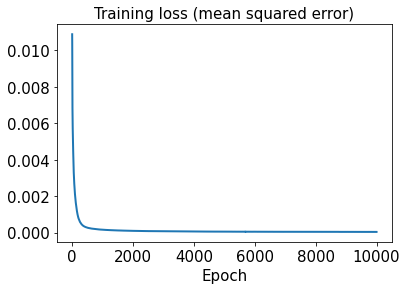

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

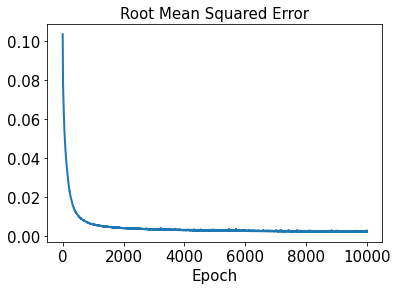

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

15/15 [==============================] - 0s 1ms/step - loss: 3.3771e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.000414338


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.031925045


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

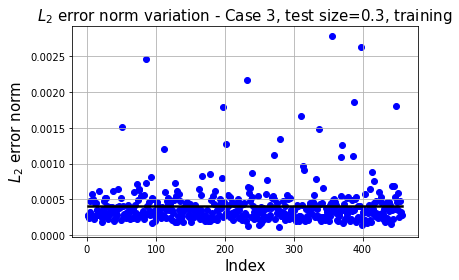

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 3, test size=0.3, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

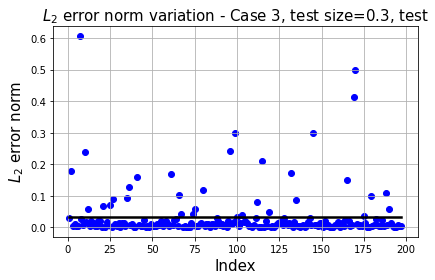

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 3, test size=0.3, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

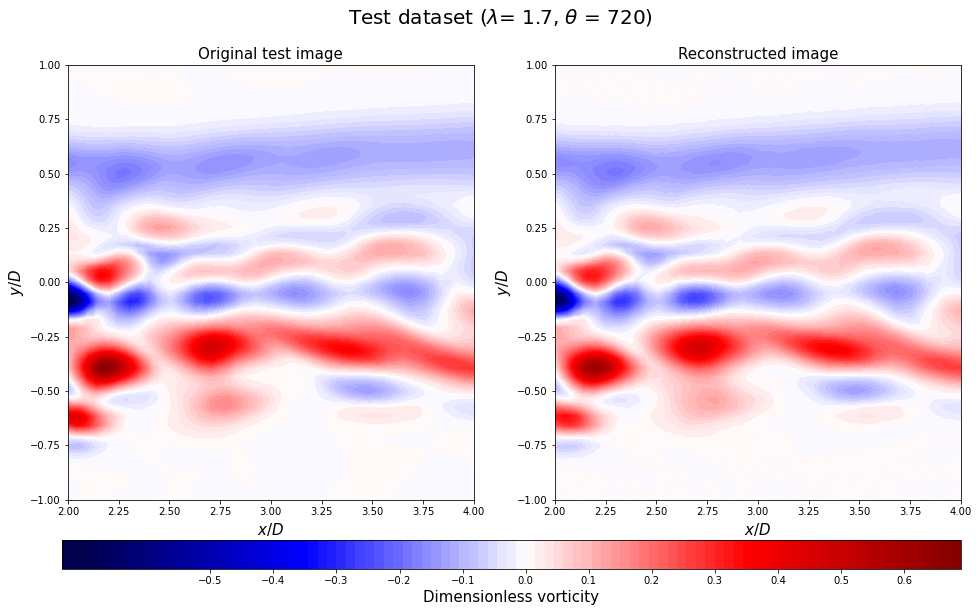

In [40]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

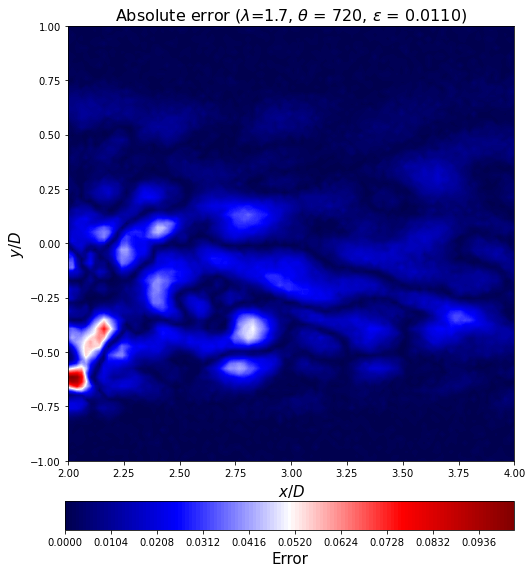

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()